**Este modelo es del informe 3 que se reemplazo por el modelo de predicción basado en XGBOOST**

In [1]:
#Imports
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_recall_fscore_support


              precision    recall  f1-score   support

        alto       0.88      0.91      0.90     11913
        bajo       0.94      0.92      0.93     12287
       medio       0.83      0.82      0.83     11852

    accuracy                           0.89     36052
   macro avg       0.88      0.88      0.88     36052
weighted avg       0.89      0.89      0.89     36052


Grupo 'bajo':
    semana   Año  Temperatura  Salinidad  Prom. Hembras Ovígeras
0        1  2012        12.55       20.0                     0.0
1        1  2012        12.00       22.0                     0.0
3        1  2012        15.70       32.0                     0.0
4        1  2012        11.70       19.0                     0.0
18       1  2012        12.00       30.0                     0.0
Cantidad de hembras ovígeras en estos ejemplos: [0.0, 0.0, 0.0, 0.0, 0.0]

Grupo 'medio':
    semana   Año  Temperatura  Salinidad  Prom. Hembras Ovígeras
2        1  2012         12.0       29.0                   

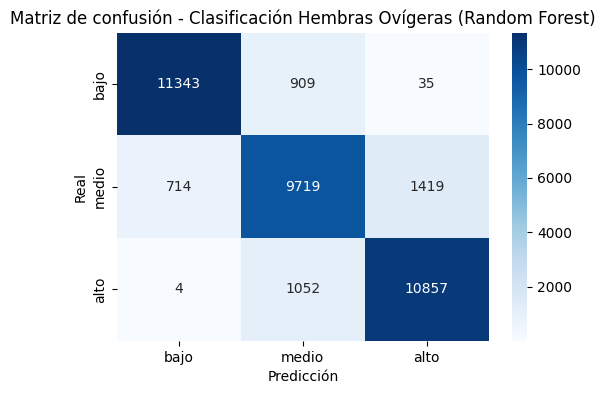

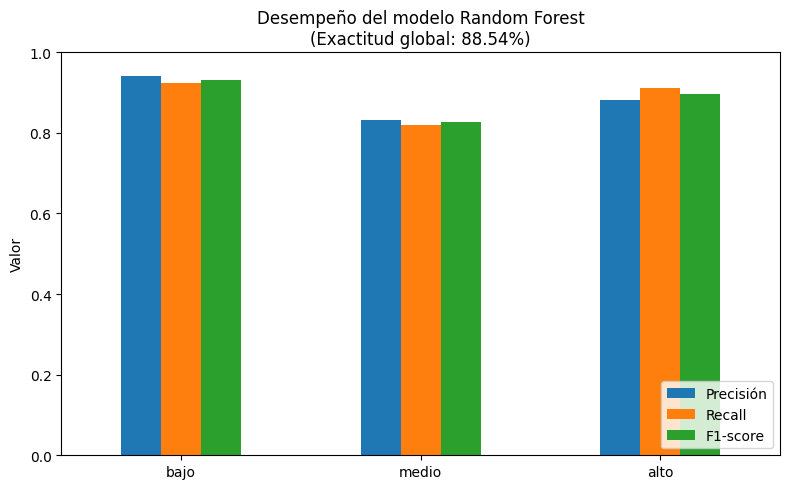

In [ ]:
#MODELO RANDOM FOREST PARA CLASIFICACIÓN DE HEMBRAS OVÍGERAS

# Carga de datos limpios
df = pd.read_excel("Archivo_Unificado_Limpio.xlsx")


variables_relevantes = [
    'semana', 'Año', 'Temperatura', 'Salinidad',
    'Prom. Hembras Ovígeras', 'Prom. Adultos Móviles', 'Prom. Juveniles'
]
df = df.dropna(subset=variables_relevantes)

# Clasificación de hembras ovígeras
terciles = df['Prom. Hembras Ovígeras'].quantile([1/3, 2/3]).values

def categorias(x):
    if x <= terciles[0]:
        return 'bajo'
    elif x <= terciles[1]:
        return 'medio'
    else:
        return 'alto'


df['Hem_Ov_Cat'] = df['Prom. Hembras Ovígeras'].apply(categorias)

# Variables predictoras
X = df[['semana', 'Año', 'Temperatura', 'Salinidad', 'Prom. Adultos Móviles', 'Prom. Juveniles']]
y = df['Hem_Ov_Cat']

#Seccion de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Modelo Random Forest con hiperparámetros sacados con GridSearchCV
clf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    bootstrap=True,
    random_state=42
)
clf.fit(X_train, y_train)

# Predicción y evaluación
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
# Mostrar 5 ejemplos de cada grupo y la cantidad de hembras ovígeras en cada uno
for grupo in ['bajo', 'medio', 'alto']:
    ejemplos = df[df['Hem_Ov_Cat'] == grupo].head(5)
    cantidad = ejemplos['Prom. Hembras Ovígeras'].tolist()
    print(f"\nGrupo '{grupo}':")
    print(ejemplos[['semana', 'Año', 'Temperatura', 'Salinidad', 'Prom. Hembras Ovígeras']])
    print(f"Cantidad de hembras ovígeras en estos ejemplos: {cantidad}")
# Matriz de confusión
target_names = ['bajo', 'medio', 'alto']
cm = confusion_matrix(y_test, y_pred, labels=target_names)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión - Clasificación Hembras Ovígeras (Random Forest)')
plt.show()


accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, labels=target_names, average=None)


metrics_df = pd.DataFrame({
    'Precisión': precision,
    'Recall': recall,
    'F1-score': f1
}, index=target_names)

metrics_df.plot(kind='bar', figsize=(8, 5))
plt.title(f'Desempeño del modelo Random Forest\n(Exactitud global: {accuracy:.2%})')
plt.ylabel('Valor')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()